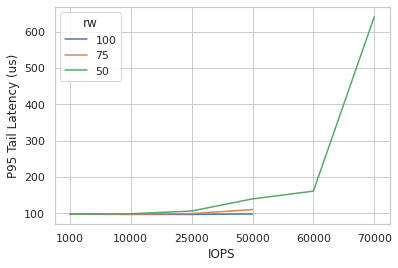

In [15]:
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")

df = pd.DataFrame()
with open("results.data", "r") as f:
    lines = f.readlines()
    for line in lines[1:]:
        line = line.strip()
        rw, size, iops, p50, p90, p95, p99, max = line.split()
        dfi = {'rw': int(rw), 'size': int(size), 'iops': int(iops),
            'p50': float(p50), 'p90': float(p90), 'p95': float(p95), 'p99': float(p99), 'max': float(max)}
        df = df.append(dfi, ignore_index=True)


g = sns.lineplot(data=df, x="iops", y="p95", hue="rw")
g.set_ylabel(f"P95 Tail Latency (us)")
g.set_xlabel("IOPS")
g.figure.savefig(f"profiling.png", dpi=300)